<a href="https://colab.research.google.com/github/ttsuneoka/GoogleColab/blob/master/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
import requests, zipfile
from io import StringIO
import io

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream = True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
ls

sample_data/  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [ ]:
import pandas as pd

student_data_math = pd.read_csv('student-mat.csv')

In [ ]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [ ]:
student_data_math = pd.read_csv('student-mat.csv',sep=";")

In [ ]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
?pd.read_csv

In [ ]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [ ]:
ls -al

total 172
drwxr-xr-x 1 root root  4096 Dec 28 05:51 ./
drwxr-xr-x 1 root root  4096 Dec 28 05:39 ../
drwxr-xr-x 1 root root  4096 Dec 18 16:52 .config/
drwxr-xr-x 1 root root  4096 Dec 18 16:52 sample_data/
-rw-r--r-- 1 root root 56993 Dec 28 05:51 student-mat.csv
-rw-r--r-- 1 root root   269 Dec 28 05:51 student-merge.R
-rw-r--r-- 1 root root 93220 Dec 28 05:51 student-por.csv
-rw-r--r-- 1 root root  3206 Dec 28 05:51 student.txt


In [ ]:
cat student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

In [ ]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [ ]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [ ]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

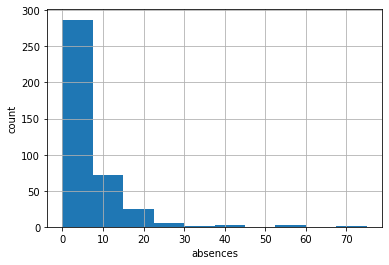

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')

plt.grid(True)

In [ ]:
print('average: ', student_data_math['absences'].mean())
print('median: ', student_data_math['absences'].median())
print('mode: ', student_data_math['absences'].mode())

average:  5.708860759493671
median:  4.0
mode:  0    0
dtype: int64


In [ ]:
import numpy as np

print('std: ', student_data_math['absences'].std())
print('var: ', np.sqrt(student_data_math['absences'].var()))

std:  8.003095687108177
var:  8.003095687108177


In [ ]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [ ]:
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

In [ ]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


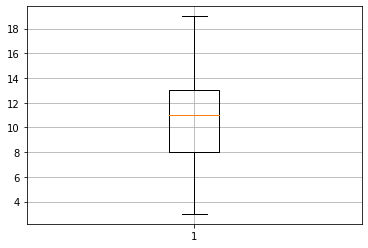

In [ ]:
plt.boxplot(student_data_math['G1'])
plt.grid(True)

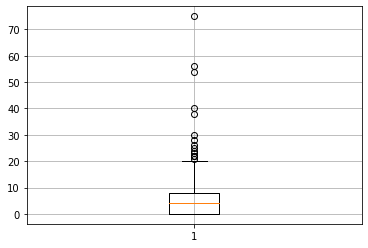

In [ ]:
plt.boxplot(student_data_math['absences'])
plt.grid(True)

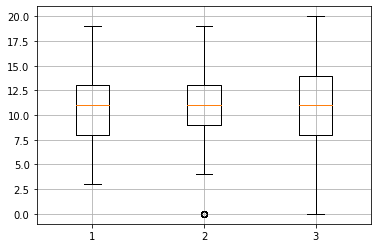

In [ ]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [ ]:
student_data_math['absences'].std()/student_data_math['absences'].mean()

1.4018726369879067

In [ ]:
student_data_math.std() / student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

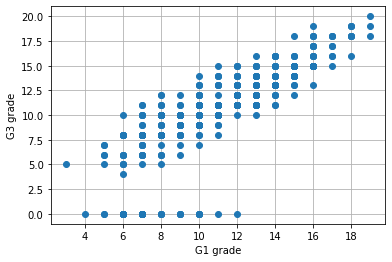

In [ ]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [ ]:
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

In [ ]:
print('Variation of G1:', student_data_math['G1'].var())
print('Variation of G3:', student_data_math['G3'].var())

Variation of G1: 11.017053267364899
Variation of G3: 20.989616397866737


In [ ]:
import scipy.stats
print(scipy.stats.pearsonr(student_data_math['G1'], student_data_math['G3']))

(0.8014679320174141, 9.001430312277354e-90)


In [ ]:
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

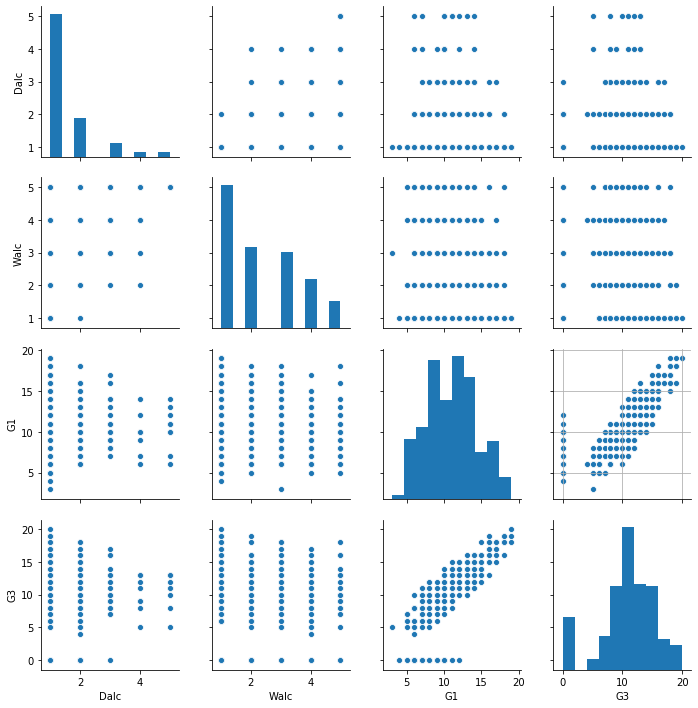

In [ ]:
import seaborn as sns
sns.pairplot(student_data_math[['Dalc','Walc','G1','G3']])
plt.grid(True)

In [ ]:
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

In [ ]:
ls

sample_data/  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [ ]:
student_data_por = pd.read_csv('student-por.csv', sep = ';')
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
student_data_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [ ]:
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
student_data_math = pd.read_csv('student-mat.csv', sep = ';')
student_data_merge = pd.merge(student_data_math, student_data_por, on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'], suffixes=('_math','_por'))
student_data_merge.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,2.280105,3.578534,5.319372,10.861257,10.712042,10.387435,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,1.282866,1.400360,7.625251,3.349167,3.832560,4.687242,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.250000,8.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.500000,11.000000,11.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


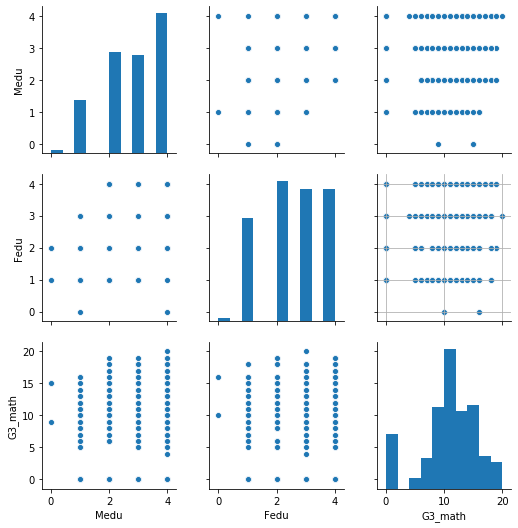

In [ ]:
sns.pairplot(student_data_merge[['Medu', 'Fedu', 'G3_math']])
plt.grid(True)

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

In [ ]:
X = student_data_math.loc[:,['G1']].values
Y = student_data_math['G3'].values

reg.fit(X, Y)

print('Regression Coefficient: ', reg.coef_)
print('Intercept:', reg.intercept_)

Regression Coefficient:  [1.10625609]
Intercept: -1.6528038288004634


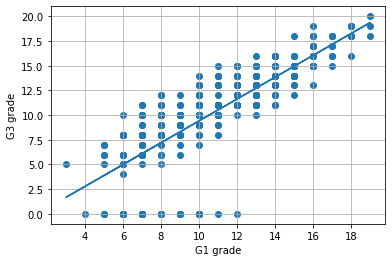

In [ ]:
plt.scatter(X,Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)

In [ ]:
print('Coefficient of determination: ',reg.score(X, Y))

Coefficient of determination:  0.6423508460522701


In [ ]:
student_data_por = pd.read_csv('student-por.csv', sep = ';')
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
X = student_data_por['G1'].values
Y = student_data_por['G3'].values

reg.fit(X, Y)

print('Regression Coefficient: ', reg.coef_)
print('Intercept:', reg.intercept_)

ValueError: ignored

In [ ]:
X = student_data_por[:,['G1']].values
Y = student_data_por[:,['G3']].values

reg.fit(X, Y)

print('Regression Coefficient: ', reg.coef_)
print('Intercept:', reg.intercept_)

ValueError: ignored

In [ ]:
Y = student_data_por['G3'].values

In [ ]:
X = student_data_por.loc[:,['absences']].values
Y = student_data_por.loc[:,['G3']].values

reg.fit(X, Y)

print('Regression Coefficient: ', reg.coef_)
print('Intercept:', reg.intercept_)
print('Coefficient of determination: ', reg.score(X, Y))

Regression Coefficient:  [[-0.06361337]]
Intercept: [12.13880086]
Coefficient of determination:  0.008350131955637385


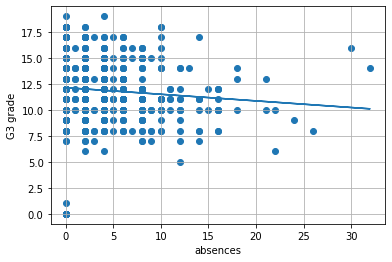

In [ ]:
plt.scatter(X, Y)
plt.xlabel('absences')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)